In [ ]:
import anndata
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peasy as ps
from palette import AGE_GROUP_PAL, CDKN_PAL_D

colony = ps.Colony(font_size=20)
artist = colony.new_artist()

In [4]:
hlca = anndata.read_h5ad('/Users/euxhenh/data/CompBio/HLCA-upd-nonan.h5ad', 'r')

In [7]:
cdkn1a = hlca[:, hlca.var['feature_name'] == 'CDKN1A'].X.toarray().ravel()
cdkn2a = hlca[:, hlca.var['feature_name'] == 'CDKN2A'].X.toarray().ravel()
assert len(cdkn1a) == len(cdkn2a) == len(hlca)

In [8]:
obs = hlca.obs.copy()
obs['CDKN1A'] = cdkn1a
obs['CDKN2A'] = cdkn2a

In [9]:
age_group = np.where(obs['age_or_mean_of_age_range'] < 30, r"$\mathcal{0}$", r"$\mathcal{1}$")
age_group[obs['age_or_mean_of_age_range'] >= 50] = r"$\mathcal{2}$"
obs['Age Group'] = pd.Categorical(age_group)

In [10]:
cell_types_to_use = np.array(['B cell', 'CD1c-positive myeloid dendritic cell',
       'CD4-positive, alpha-beta T cell',
       'CD8-positive, alpha-beta T cell', 'acinar cell',
       'alveolar macrophage', 'alveolar type 1 fibroblast cell',
       'alveolar type 2 fibroblast cell', 'bronchus fibroblast of lung',
       'capillary endothelial cell',
       'ciliated columnar cell of tracheobronchial tree',
       'classical monocyte', 'club cell', 'elicited macrophage',
       'endothelial cell of lymphatic vessel',
       'epithelial cell of lower respiratory tract', 'lung macrophage',
       'mast cell', 'multi-ciliated epithelial cell',
       'nasal mucosa goblet cell', 'natural killer cell',
       'non-classical monocyte', 'plasma cell',
       'pulmonary artery endothelial cell', 'respiratory basal cell',
       'respiratory hillock cell', 'tracheobronchial smooth muscle cell',
       'type I pneumocyte', 'type II pneumocyte', 'vein endothelial cell'])

In [11]:
obs = obs[obs['cell_type'].isin(cell_types_to_use)]
obs['cell_type'] = pd.Categorical(obs['cell_type'], sorted(obs['cell_type'].unique()))

### Compute CDKN(1|2)A sparsity for the aged group

In [12]:
df_melted = obs[obs['age_or_mean_of_age_range'] >= 50].melt(
    id_vars='cell_type', value_vars=['CDKN1A', 'CDKN2A'],
    var_name='gene', value_name='expression'
)

In [13]:
df_melted['is_zero'] = df_melted['expression'] == 0
sparsity = df_melted.groupby(['cell_type', 'gene'])['is_zero'].mean().reset_index()

/var/folders/b_/1w737bbn611fq7bhjvy_zm240000gn/T/ipykernel_9735/1336981137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sparsity = df_melted.groupby(['cell_type', 'gene'])['is_zero'].mean().reset_index()


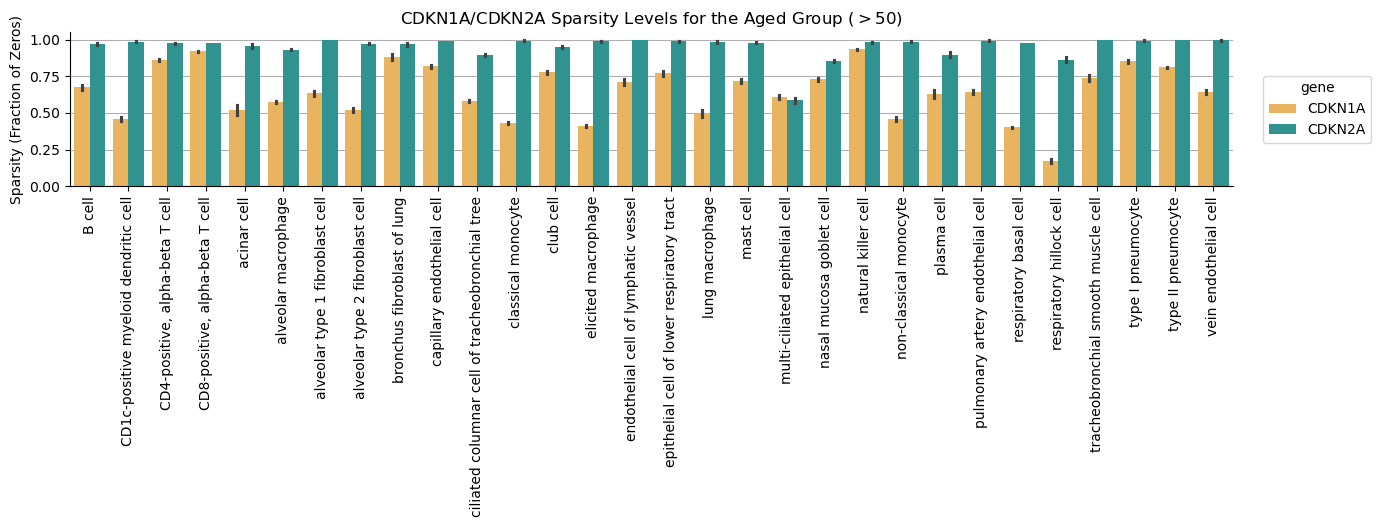

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))
sns.barplot(
    data=df_melted,
    x='cell_type',
    y='is_zero',
    hue='gene',
    palette=CDKN_PAL_D,
)
ax.set_ylabel('Sparsity (Fraction of Zeros)')
ax.set_title(r'CDKN1A/CDKN2A Sparsity Levels for the Aged Group ($>50$)')
ax.tick_params(axis='x', rotation=90)

sns.move_legend(ax, loc='center left', bbox_to_anchor=(1.02, 0.5))
sns.despine(ax=ax)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xlabel('')
ax.grid(axis='y', zorder=0)

artist.savefig('figures/p16/sparsity-old.pdf')

### Show Expression Boxplots

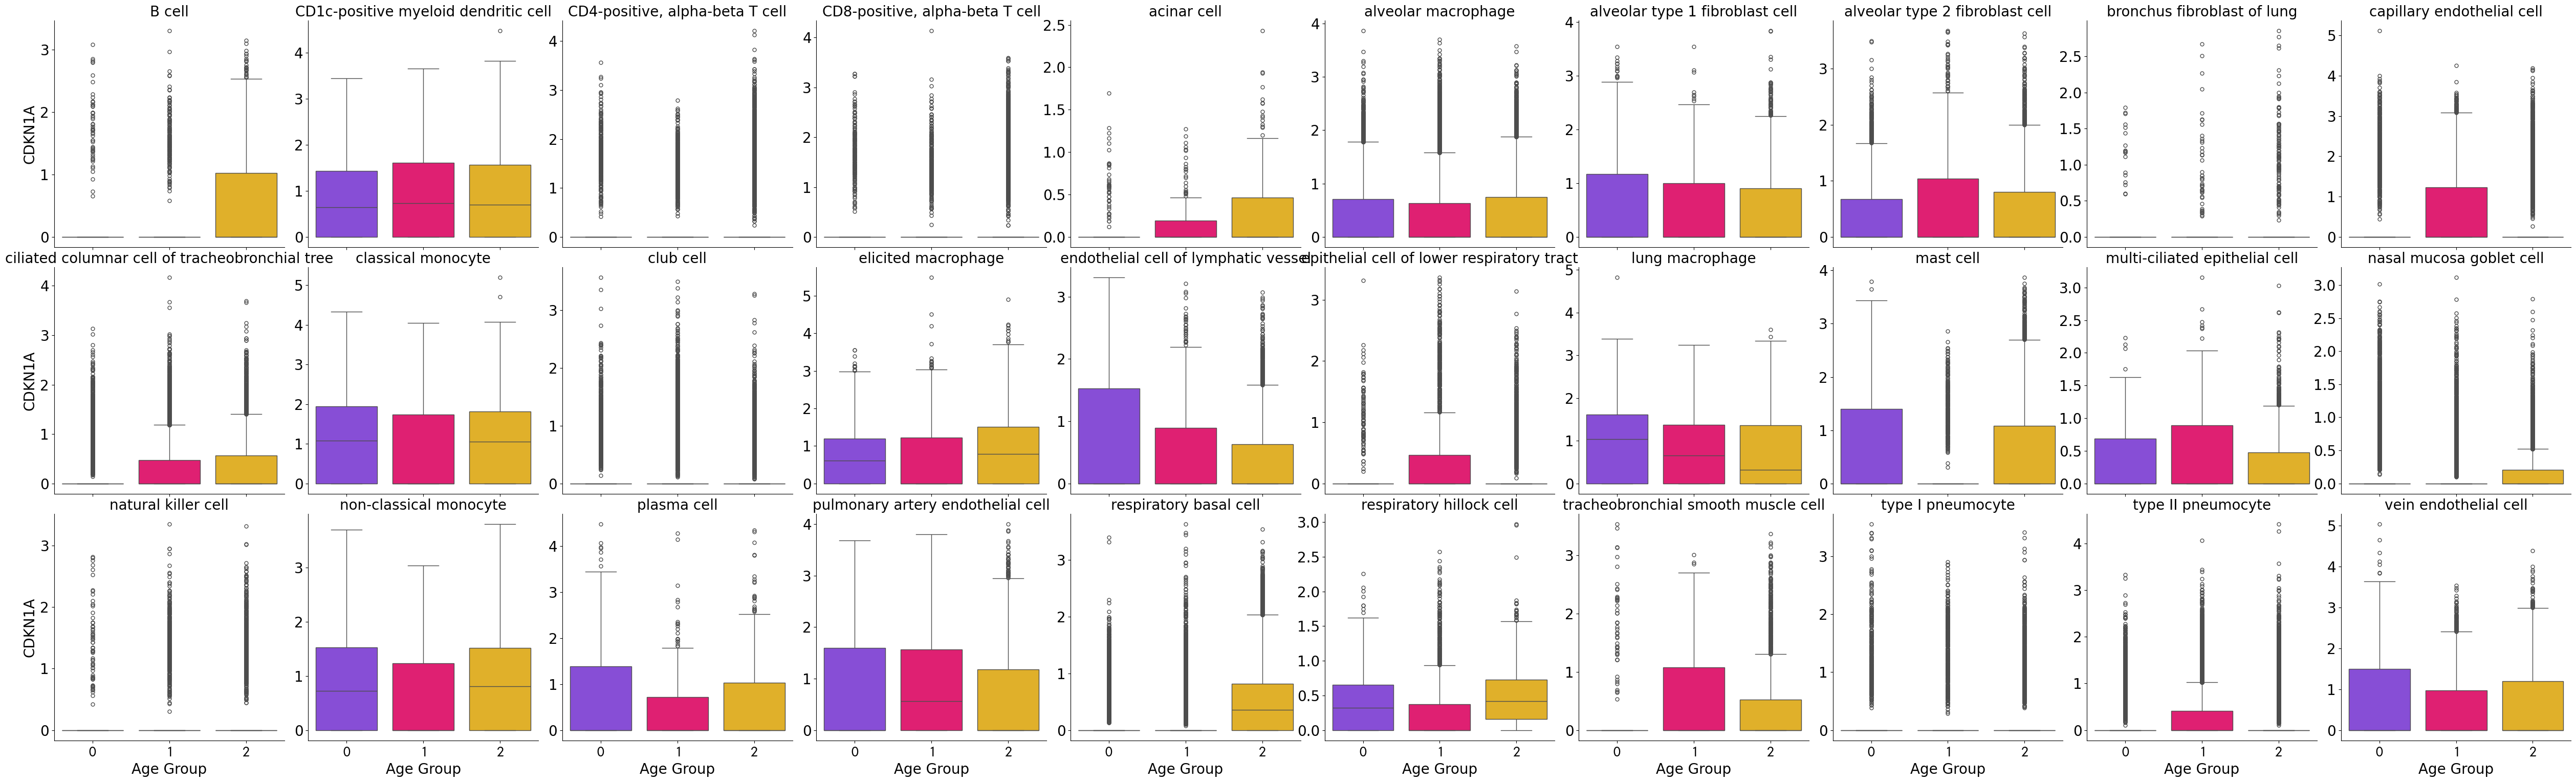

In [ ]:
g = sns.catplot(
    obs,
    x='Age Group',
    y="CDKN1A",
    hue="Age Group",
    kind='box',
    col='cell_type',
    palette=AGE_GROUP_PAL,
    col_wrap=10,
    sharey=False,
    # fill=False,
)

g.set_titles(template="{col_name}")

for ax in g.axes.flat:
    colony.correct_font_size(ax)

artist.savefig("figures/p16/CDKN1A-low.pdf", dpi=150)

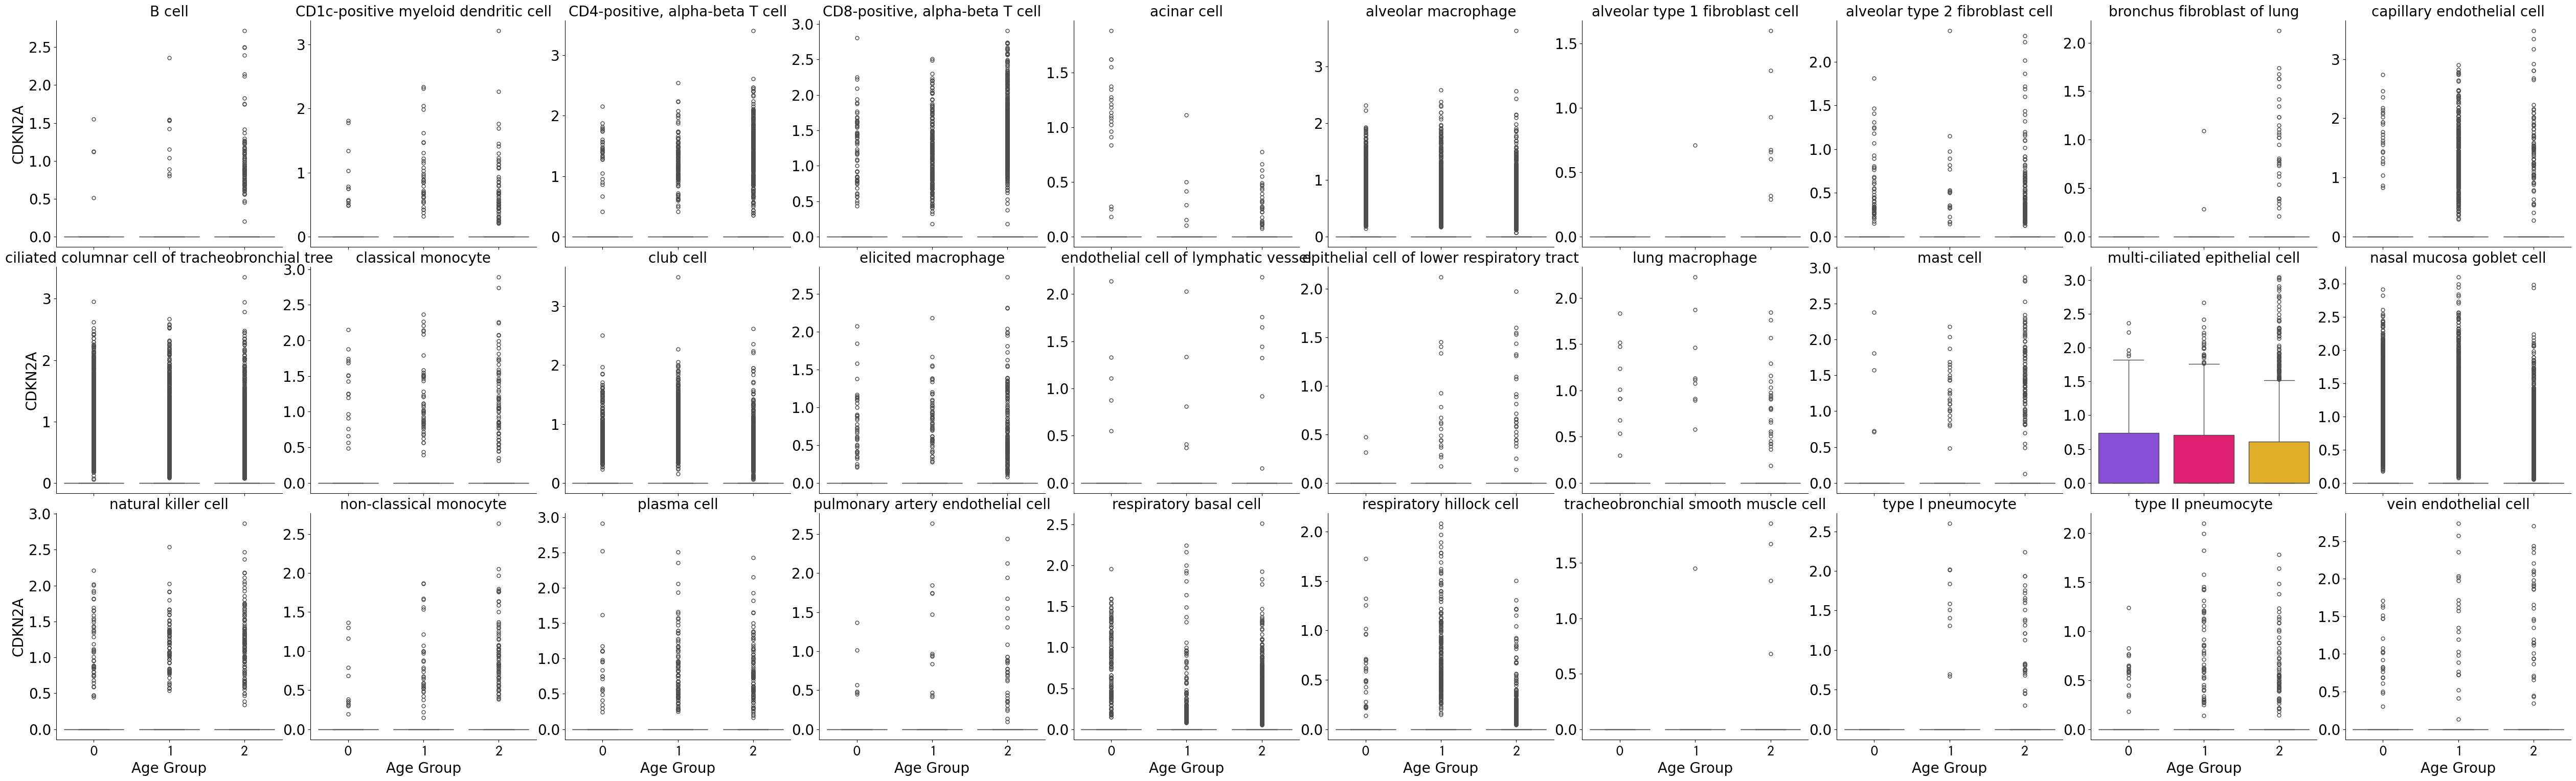

In [ ]:
g = sns.catplot(
    obs,
    x='Age Group',
    y="CDKN2A",
    hue="Age Group",
    kind='box',
    col='cell_type',
    palette=AGE_GROUP_PAL,
    col_wrap=10,
    sharey=False,
)

g.set_titles(template="{col_name}")

for ax in g.axes.flat:
    colony.correct_font_size(ax)

artist.savefig("figures/p16/CDKN2A-low.pdf", dpi=150)